In [259]:
!wget https://raw.githubusercontent.com/joestubbs/coe379L-sp25/master/datasets/unit01/project1.csv

--2025-02-22 22:35:19--  https://raw.githubusercontent.com/joestubbs/coe379L-sp25/master/datasets/unit01/project1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25651 (25K) [text/plain]
Saving to: ‘project1.csv’

project1.csv        100%[===================>]  25.05K  --.-KB/s    in 0.006s  

2025-02-22 22:35:19 (4.23 MB/s) - ‘project1.csv’ saved [25651/25651]



In [261]:
import pandas as pd
breast_cancer = pd.read_csv('project1.csv')

In [262]:
# Part 1

In [263]:
breast_cancer.shape

(386, 10)

In [264]:
breast_cancer.size

3860

In [265]:
breast_cancer.info()

#now I will check what information each of the variables have, and if they need datatype conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        386 non-null    object
 1   age          386 non-null    object
 2   menopause    386 non-null    object
 3   tumor-size   385 non-null    object
 4   inv-nodes    385 non-null    object
 5   node-caps    386 non-null    object
 6   deg-malig    386 non-null    int64 
 7   breast       386 non-null    object
 8   breast-quad  386 non-null    object
 9   irradiat     386 non-null    object
dtypes: int64(1), object(9)
memory usage: 30.3+ KB


In [266]:
breast_cancer['class']

0         recurrence-events
1      no-recurrence-events
2         recurrence-events
3      no-recurrence-events
4      no-recurrence-events
               ...         
381    no-recurrence-events
382    no-recurrence-events
383    no-recurrence-events
384    no-recurrence-events
385    no-recurrence-events
Name: class, Length: 386, dtype: object

In [267]:
breast_cancer['menopause']

0      premeno
1      premeno
2      premeno
3         ge40
4      premeno
        ...   
381    premeno
382       ge40
383    premeno
384    premeno
385    premeno
Name: menopause, Length: 386, dtype: object

In [268]:
breast_cancer['age']

0      30-39
1      40-49
2      40-49
3      60-69
4      40-49
       ...  
381    40-49
382    60-69
383    70-79
384    70-79
385    60-69
Name: age, Length: 386, dtype: object

In [270]:
breast_cancer['tumor-size']

0      30-34
1      20-24
2      20-24
3      15-19
4        0-4
       ...  
381    30-34
382    30-34
383    20-24
384    30-34
385    30-34
Name: tumor-size, Length: 386, dtype: object

In [272]:
breast_cancer['inv-nodes']

0       0-2
1       0-2
2       0-2
3       0-2
4       0-2
       ... 
381     3-5
382     3-5
383     0-2
384    9-11
385    9-11
Name: inv-nodes, Length: 386, dtype: object

In [273]:
breast_cancer['node-caps']

0       no
1       no
2       no
3       no
4       no
      ... 
381     no
382    yes
383     no
384     no
385     no
Name: node-caps, Length: 386, dtype: object

In [274]:
breast_cancer['deg-malig']

0      3
1      2
2      2
3      2
4      2
      ..
381    3
382    2
383    3
384    1
385    2
Name: deg-malig, Length: 386, dtype: int64

In [275]:
breast_cancer['breast']

0       left
1      right
2       left
3      right
4      right
       ...  
381    right
382    right
383    right
384    right
385    right
Name: breast, Length: 386, dtype: object

In [276]:
breast_cancer['breast-quad']

0       left_low
1       right_up
2       left_low
3        left_up
4      right_low
         ...    
381     left_low
382      left_up
383     right_up
384     left_low
385     left_low
Name: breast-quad, Length: 386, dtype: object

In [277]:
breast_cancer['irradiat']

0       no
1       no
2       no
3       no
4       no
      ... 
381     no
382    yes
383     no
384    yes
385     no
Name: irradiat, Length: 386, dtype: object

In [ ]:
# We can see that all of the variables we have are categorical. Therefore, we are going to be able to complete one-hot encoding, 
# but we will do this later. Other than that, no datatype conversion is needed.

In [278]:
#checking if there are null values in the dataset
breast_cancer.isnull().sum()

class          0
age            0
menopause      0
tumor-size     1
inv-nodes      1
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [279]:
#First, I'm going to treat the missing data
breast_cancer.isnull().sum()

class          0
age            0
menopause      0
tumor-size     1
inv-nodes      1
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [280]:
breast_cancer['tumor-size'].fillna(breast_cancer['tumor-size'].mode()[0], inplace=True)
breast_cancer['inv-nodes'].fillna(breast_cancer['inv-nodes'].mode()[0], inplace=True)

In [281]:
# Now, I am going to be treating the data as categorical data, and use one-hot encoding

In [282]:
breast_cancer['class'] = breast_cancer['class'].astype("category")
breast_cancer['age'] = breast_cancer['age'].astype("category")
breast_cancer['menopause'] = breast_cancer['menopause'].astype("category")
breast_cancer['tumor-size'] = breast_cancer['tumor-size'].astype("category")
breast_cancer['inv-nodes'] = breast_cancer['inv-nodes'].astype("category")
breast_cancer['node-caps'] = breast_cancer['node-caps'].astype("category")
breast_cancer['deg-malig'] = breast_cancer['deg-malig'].astype("category")
breast_cancer['breast'] = breast_cancer['breast'].astype("category")
breast_cancer['breast-quad'] = breast_cancer['breast-quad'].astype("category")
breast_cancer['irradiat'] = breast_cancer['irradiat'].astype("category")


In [283]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   class        386 non-null    category
 1   age          386 non-null    category
 2   menopause    386 non-null    category
 3   tumor-size   386 non-null    category
 4   inv-nodes    386 non-null    category
 5   node-caps    386 non-null    category
 6   deg-malig    386 non-null    category
 7   breast       386 non-null    category
 8   breast-quad  386 non-null    category
 9   irradiat     386 non-null    category
dtypes: category(10)
memory usage: 6.0 KB


In [284]:
# Checking if there are duplicate values and dropping them
breast_cancer.duplicated().sum()
breast_cancer.drop_duplicates(inplace=True, ignore_index=True)

In [285]:
# Performing univariate analysis
breast_cancer.describe()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
count,374,374,374,374,374,374,374,374,374,374
unique,2,6,3,11,7,4,3,2,7,2
top,no-recurrence-events,40-49,premeno,30-34,0-2,no,2,left,left_low,no
freq,253,114,210,83,233,265,160,190,137,292


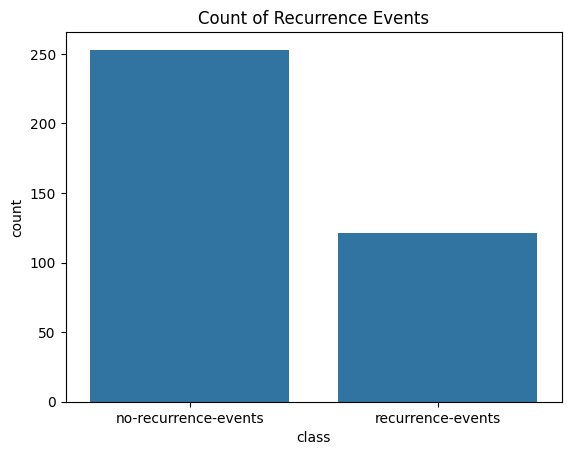

In [286]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=breast_cancer, x='class')

plt.title('Count of Recurrence Events')
plt.show()


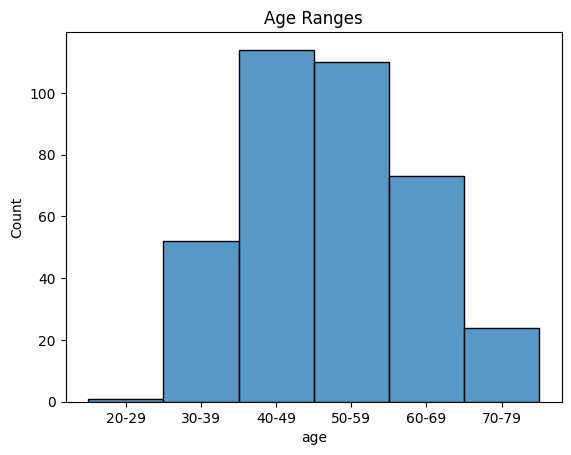

In [287]:
sns.histplot(data=breast_cancer, x='age')

plt.title('Age Ranges')
plt.show()


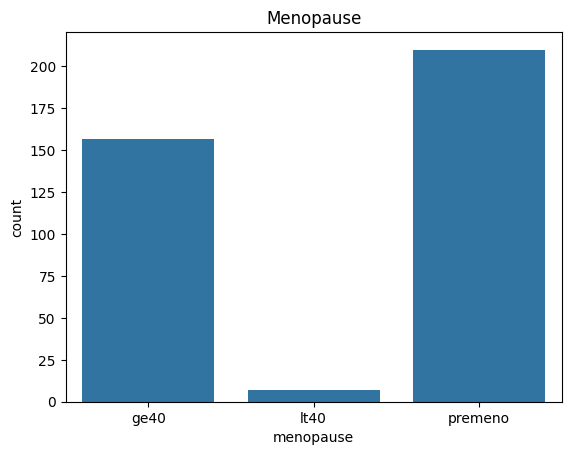

In [288]:
sns.countplot(data=breast_cancer, x='menopause')

plt.title('Menopause')
plt.show()


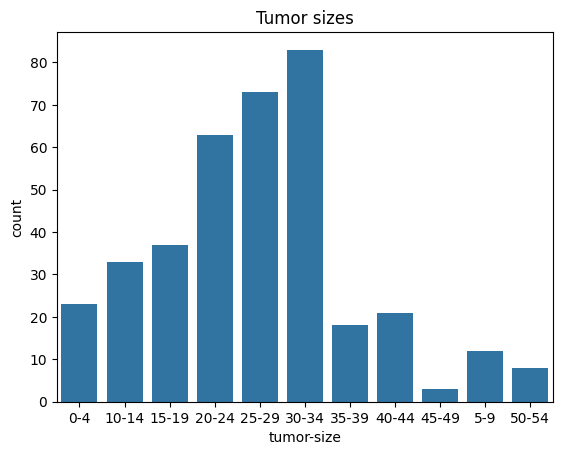

In [289]:
sns.countplot(data=breast_cancer, x='tumor-size')

plt.title('Tumor sizes')
plt.show()


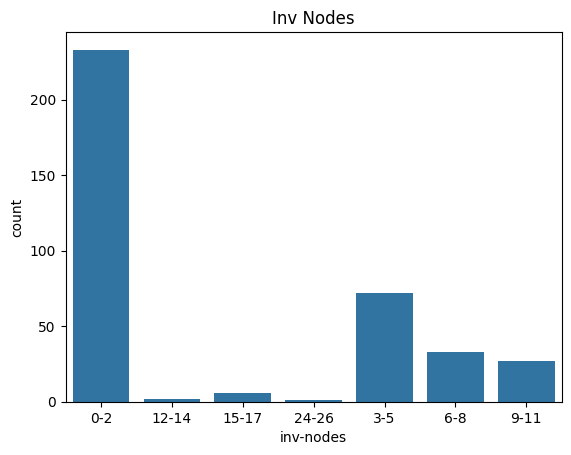

In [290]:
sns.countplot(data=breast_cancer, x='inv-nodes')

plt.title('Inv Nodes')
plt.show()


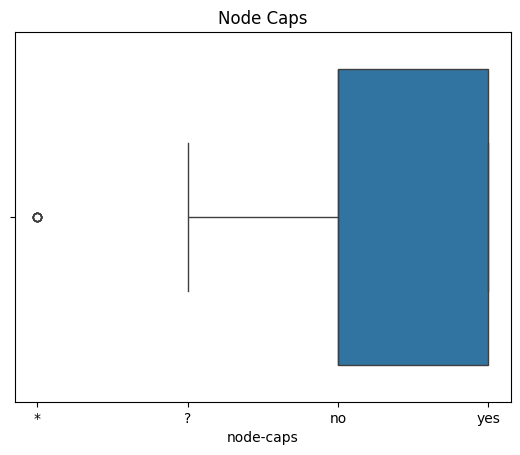

In [291]:
sns.boxplot(data=breast_cancer, x='node-caps')

plt.title('Node Caps')
plt.show()


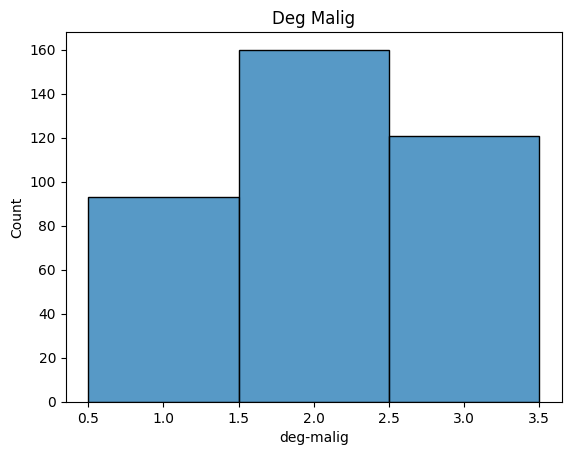

In [292]:
sns.histplot(data=breast_cancer, x='deg-malig')

plt.title('Deg Malig')
plt.show()


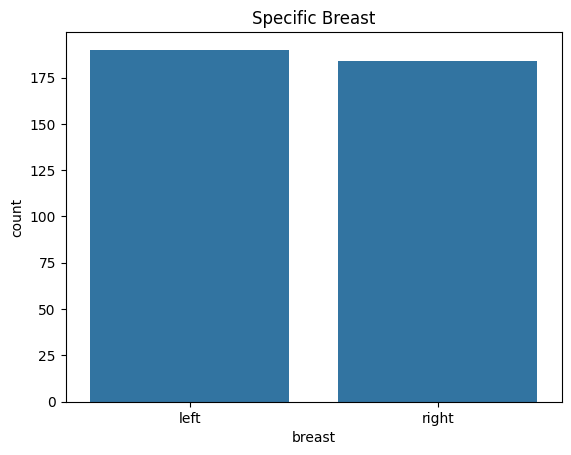

In [293]:
sns.countplot(data=breast_cancer, x='breast')

plt.title('Specific Breast')
plt.show()


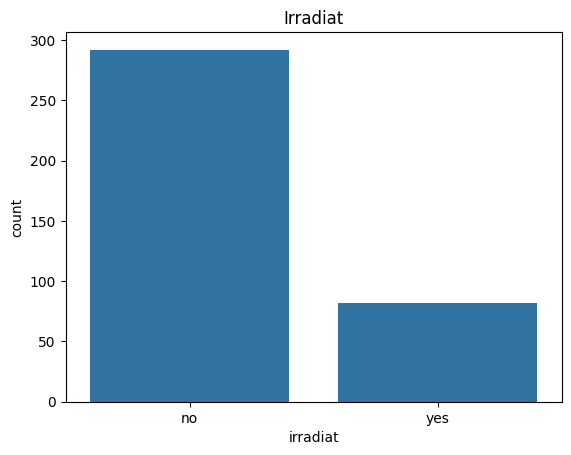

In [294]:

sns.countplot(data=breast_cancer, x='irradiat')

plt.title('Irradiat')
plt.show()


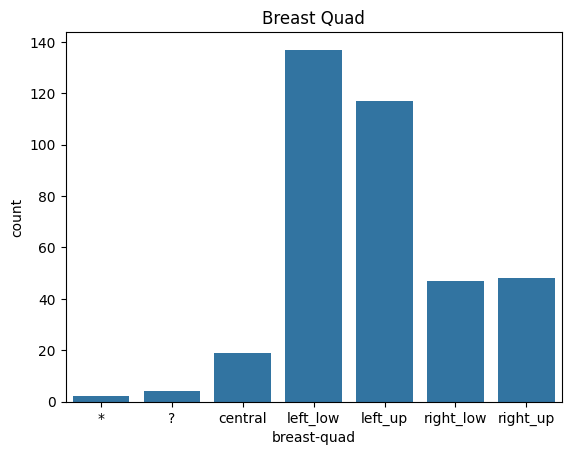

In [295]:

sns.countplot(data=breast_cancer, x='breast-quad')

plt.title('Breast Quad')
plt.show()


In [296]:
# Based on these plots, the plots reveal several interesting patterns across the different categorical features. 
# For menopause-related variables, most patients in the dataset are either pre-menopausal or have reached menopause after the age of 40.
# From our irradiat plot, more individuals are not going through radiation therapy. Additionally, majority of individuals have a tumor with size 30-34. 
# A lot of patients tumors' are located in the lower left quadrant of their breast.
# There are many other factors that the dataset tells us, however, this is just a partial amount.

In [297]:
# Now completing one-hot encoding

breast_cancer = pd.get_dummies(breast_cancer, columns=["class"], drop_first=True)
breast_cancer = pd.get_dummies(breast_cancer, columns=["age"], drop_first=True)
breast_cancer = pd.get_dummies(breast_cancer, columns=["menopause"], drop_first=True)
breast_cancer = pd.get_dummies(breast_cancer, columns=["tumor-size"], drop_first=True)
breast_cancer = pd.get_dummies(breast_cancer, columns=["inv-nodes"], drop_first=True)
breast_cancer = pd.get_dummies(breast_cancer, columns=["node-caps"], drop_first=True)
breast_cancer = pd.get_dummies(breast_cancer, columns=["deg-malig"], drop_first=True)
breast_cancer = pd.get_dummies(breast_cancer, columns=["breast"], drop_first=True)
breast_cancer = pd.get_dummies(breast_cancer, columns=["breast-quad"], drop_first=True)
breast_cancer = pd.get_dummies(breast_cancer, columns=["irradiat"], drop_first=True)

breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   class_recurrence-events  374 non-null    bool 
 1   age_30-39                374 non-null    bool 
 2   age_40-49                374 non-null    bool 
 3   age_50-59                374 non-null    bool 
 4   age_60-69                374 non-null    bool 
 5   age_70-79                374 non-null    bool 
 6   menopause_lt40           374 non-null    bool 
 7   menopause_premeno        374 non-null    bool 
 8   tumor-size_10-14         374 non-null    bool 
 9   tumor-size_15-19         374 non-null    bool 
 10  tumor-size_20-24         374 non-null    bool 
 11  tumor-size_25-29         374 non-null    bool 
 12  tumor-size_30-34         374 non-null    bool 
 13  tumor-size_35-39         374 non-null    bool 
 14  tumor-size_40-44         374 non-null    bool 
 15  tumor-

In [298]:
# Part 2

In [299]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = breast_cancer.drop('class_recurrence-events', axis=1) 
y = breast_cancer['class_recurrence-events']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  stratify=y, random_state = 1)

print("Training class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTesting class distribution:")
print(y_test.value_counts(normalize=True))


Training class distribution:
class_recurrence-events
False    0.678161
True     0.321839
Name: proportion, dtype: float64

Testing class distribution:
class_recurrence-events
False    0.672566
True     0.327434
Name: proportion, dtype: float64


In [300]:
# KNN Classifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [301]:
# K-Nearest Neighbors (KNN) Report:

print("K-Nearest Neighbors Report:")
print('Accuracy on test data: {:.2f}'.format(accuracy_score(y_test, knn.predict(X_test))))
print('Accuracy on train data: {:.2f}'.format(accuracy_score(y_train, knn.predict(X_train))))

print('Recall on test data: {:.2f}'.format(recall_score(y_test, knn.predict(X_test))))
print('Recall on train data: {:.2f}'.format(recall_score(y_train, knn.predict(X_train))))

print('Precision on test data: {:.2f}'.format(precision_score(y_test, knn.predict(X_test))))
print('Precision on train data: {:.2f}'.format(precision_score(y_train, knn.predict(X_train))))

print('F1-score on test data: {:.2f}'.format(f1_score(y_test, knn.predict(X_test))))
print('F1-score on train data: {:.2f}'.format(f1_score(y_train, knn.predict(X_train))))

K-Nearest Neighbors Report:
Accuracy on test data: 0.58
Accuracy on train data: 0.76
Recall on test data: 0.19
Recall on train data: 0.49
Precision on test data: 0.28
Precision on train data: 0.68
F1-score on test data: 0.23
F1-score on train data: 0.57


In [302]:
# KNN Classifer using GridSearchCV

knn_search_recall = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1, 100)}

knn_gscv2 = GridSearchCV(knn_search_recall, param_grid, cv=5)

knn_gscv2.fit(X_train, y_train)
knn_gscv2.best_params_

{'n_neighbors': 10}

In [303]:
best_knn = knn_gscv2.best_estimator_

In [304]:
# KNN GridSearchCV Report
print("K-Nearest Neighbors GridSearchCV Report:")
print('Accuracy on test data: {:.2f}'.format(accuracy_score(y_test, best_knn.predict(X_test))))
print('Accuracy on train data: {:.2f}'.format(accuracy_score(y_train, best_knn.predict(X_train))))
print('Recall on test data: {:.2f}'.format(recall_score(y_test, best_knn.predict(X_test))))
print('Recall on train data: {:.2f}'.format(recall_score(y_train, best_knn.predict(X_train))))
print('Precision on test data: {:.2f}'.format(precision_score(y_test, best_knn.predict(X_test))))
print('Precision on train data: {:.2f}'.format(precision_score(y_train, best_knn.predict(X_train))))
print('F1-score on test data: {:.2f}'.format(f1_score(y_test, best_knn.predict(X_test))))
print('F1-score on train data: {:.2f}'.format(f1_score(y_train, best_knn.predict(X_train))))


K-Nearest Neighbors GridSearchCV Report:
Accuracy on test data: 0.67
Accuracy on train data: 0.70
Recall on test data: 0.11
Recall on train data: 0.13
Precision on test data: 0.50
Precision on train data: 0.69
F1-score on test data: 0.18
F1-score on train data: 0.22


In [305]:
# Linear Classification
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="perceptron", alpha=0.01)
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.01, loss='perceptron')

In [307]:
#Linear Classification Report
print("Linear Classification")
print('Accuracy on test data: {:.2f}'.format(accuracy_score(y_test, clf.predict(X_test))))
print('Accuracy on train data: {:.2f}'.format(accuracy_score(y_train, clf.predict(X_train))))

print('Recall on test data: {:.2f}'.format(recall_score(y_test, clf.predict(X_test))))
print('Recall on train data: {:.2f}'.format(recall_score(y_train, clf.predict(X_train))))

print('Precision on test data: {:.2f}'.format(precision_score(y_test, clf.predict(X_test))))
print('Precision on train data: {:.2f}'.format(precision_score(y_train, clf.predict(X_train))))

print('F1-score on test data: {:.2f}'.format(f1_score(y_test, clf.predict(X_test))))
print('F1-score on train data: {:.2f}'.format(f1_score(y_train, clf.predict(X_train))))


Linear Classification
Accuracy on test data: 0.53
Accuracy on train data: 0.58
Recall on test data: 0.51
Recall on train data: 0.63
Precision on test data: 0.35
Precision on train data: 0.40
F1-score on test data: 0.42
F1-score on train data: 0.49


In [ ]:
# I believe the most important metric in this case can be considered recall. Recall is incredibly important when it comes to data regarding diseases as
# it helps minimize the amount of falsae negatives that we have. 